<a href="https://colab.research.google.com/github/NayeliZuniga/Simulacion1/blob/main/Monte_Carlo_(Media_muestral).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo **Crudo** (Media Muestral)

I **=** $∫ g(x) dx$ **=** $∫ w(x) ⋅ f(x) dx$ **=** $E(g(x))$ **≈** $(\frac{1}{N}) ⋅ \sum g(x_i)$


Donde:
* $x_i \sim U(a,b)$
* $w(x)=g(x)⋅(b-a)$
* $f(x)=\frac{1}{b-a} → U(a,b)$

La integral transformada puede interpretarse como un multiplo del valor esperado de $g(x)$ bajo la distribucion uniforme: $E(g(X))=\frac{I}{b-a}$ con $X \sim Unif(a,b)$. Si tomamos una muestra de numeros pseudoaleatorios uniformemente distribuidos, digamos $X_1,...,X_N \sim Unif(a, b)$, por la ley de los grandes numeros. Para N sucientemente grande tendremos que, con probabilidad 1: $\frac{1}{N}\sum_{i=1}^N g(X_i) \to E(g(X))=\frac{I}{b-a}$

Se importan las librerias necesarias

In [45]:
import random
import math
import matplotlib.pyplot as plot
import numpy
from scipy.integrate import quad

Se define la funcion de la cual se quiere aproximar la integral

In [46]:
def g(x):
  x=math.sqrt(math.atan(x))
  return x

Consideremos el metodo de Monte Carlo de la Media Muestral

In [48]:
def montecarlo_crudo(a, b, n):        #a & b:intervalos de integracion
  al=[]                               #lista para la secuencia {U_i}_{i=1}^n ~ U(0,1)
  x=[]
  gx=[]                               #lista para la evaluiacion de x
  for i in range(n):
  #secuencia {U_i}_{i=1}^n ~ U(0,1)
    al.append(random.uniform(a,b))
  #x_i= a + U_i * (b-a)
    x.append(a+(al[i]*(b-a)))
  #Evaluacion de los x en la funcion
    gx.append(g(x[i]))
  #Estimador
  teta=(b-a)*sum(gx)
  return teta/n


Aplicandolo

In [49]:
montecarlo_crudo(0,1,1000)

0.6302520028442129

La aproximacion es 0.6324771172861694, con un error absoluto de 0.002653773078196031 y uno relativo de 0.42135197156486015 %


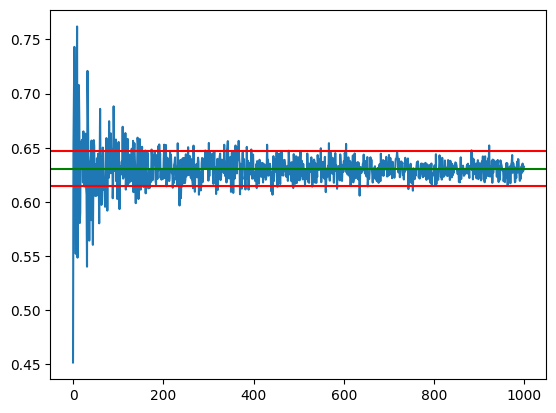

In [87]:
#Función que permite guardar la aproximacion de la integral segun incrementa el nunmero de iteraciones
def experimento(k,a,b):                         #k:numero de iteraciones; a&b: intervalos de integracion
  evolucion=[]                                  #Guarda la aprox por iteracion
  for i in range(k):
    evolucion.append(montecarlo_crudo(a,b,i+1))
  plot.plot(evolucion)                          #grafica los cambios en la aproximación
  aprox=evolucion[-1]                           #retoma la ultima aproximacion
  integral=quad(g,a,b)                          #calcula la integral exacta
  errabs=abs(aprox - integral[0])               #calculo del err absoluto
  errrel=abs(errabs/(integral[0]))*100          #calculo del err relartivo
  print(f"La aproximacion es {aprox}, con un error absoluto de {errabs} y uno relativo de {errrel} %")
  return evolucion

L=experimento(1000,0,1)
plot.axhline(y=numpy.mean(L), color='g')
plot.axhline(y=(numpy.mean(L)+numpy.std(L)), color='r')
plot.axhline(y=(numpy.mean(L)-numpy.std(L)), color='r')